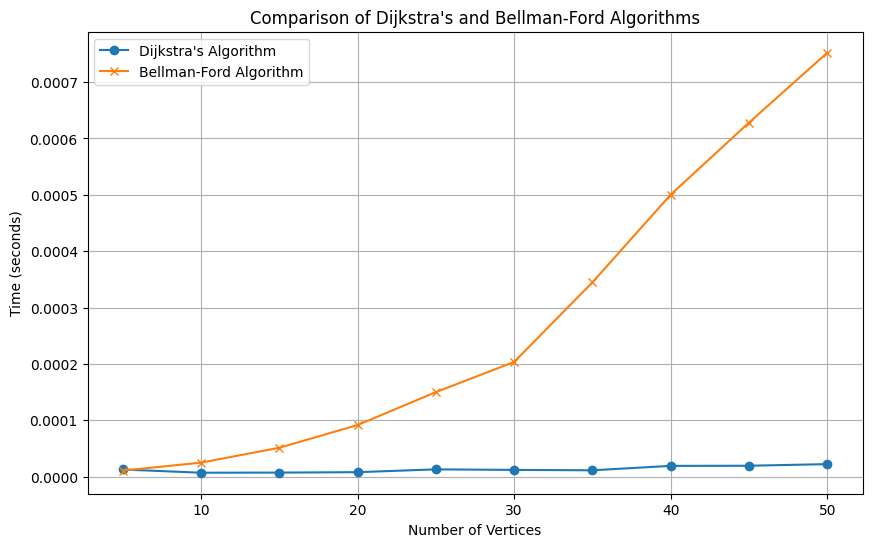

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import heapq

class Graph:
    def __init__(self, vertices):
        self.V = vertices  # Number of vertices
        self.adj_list = {i: [] for i in range(vertices)}  # Adjacency list

    def add_edge(self, u, v, weight):
        self.adj_list[u].append((v, weight))  # Directed graph

    def dijkstra(self, start):
        distances = {i: float('inf') for i in range(self.V)}
        distances[start] = 0
        priority_queue = [(0, start)]  # (distance, vertex)

        while priority_queue:
            current_distance, current_vertex = heapq.heappop(priority_queue)

            if current_distance > distances[current_vertex]:
                continue

            for neighbor, weight in self.adj_list[current_vertex]:
                distance = current_distance + weight

                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

        return distances

    def bellman_ford(self, start):
        distances = {i: float('inf') for i in range(self.V)}
        distances[start] = 0

        for _ in range(self.V - 1):
            for u in range(self.V):
                for v, weight in self.adj_list[u]:
                    if distances[u] + weight < distances[v]:
                        distances[v] = distances[u] + weight

        return distances

def compare_algorithms(graph_size, edge_density):
    g = Graph(graph_size)

    # Randomly add edges to the graph
    for _ in range(int(graph_size * edge_density)):
        u = random.randint(0, graph_size - 1)
        v = random.randint(0, graph_size - 1)
        weight = random.randint(1, 10)
        g.add_edge(u, v, weight)

    # Measure Dijkstra's execution time
    start_time = time.time()
    g.dijkstra(0)  # Start from vertex 0
    dijkstra_time = time.time() - start_time

    # Measure Bellman-Ford execution time
    start_time = time.time()
    g.bellman_ford(0)  # Start from vertex 0
    bellman_ford_time = time.time() - start_time

    return dijkstra_time, bellman_ford_time

# Main execution
if __name__ == "__main__":
    graph_sizes = list(range(5, 51, 5))  # Graph sizes from 5 to 50
    dijkstra_times = []
    bellman_ford_times = []
    edge_density = 0.3  # Proportion of edges

    for size in graph_sizes:
        d_time, bf_time = compare_algorithms(size, edge_density)
        dijkstra_times.append(d_time)
        bellman_ford_times.append(bf_time)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(graph_sizes, dijkstra_times, label='Dijkstra\'s Algorithm', marker='o')
    plt.plot(graph_sizes, bellman_ford_times, label='Bellman-Ford Algorithm', marker='x')
    plt.title('Comparison of Dijkstra\'s and Bellman-Ford Algorithms')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid()
    plt.show()

